<a href="https://colab.research.google.com/github/addo561/learning-pytorch/blob/main/pytorch_workflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
from torch import nn
import matplotlib.pyplot as plt

## Data

In [ ]:
weight =0.7
bias = 0.3

X = torch.arange(0,1,0.02).unsqueeze(dim=1)
y = X * weight + bias

X[:5],y[:5]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560]]))

In [ ]:
len(X),len(y)

(50, 50)

train_test_split


In [ ]:
train_split = int(0.8 * len(X))


In [ ]:
X_train,y_train = X[:train_split],y[:train_split]
X_test,y_test = X[train_split:],y[train_split:]

In [ ]:
len(X_train),len(X_test),len(y_train),len(y_test)

(40, 10, 40, 10)

In [ ]:
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=None):
  """
  Plots training data, test data and compares predictions.
  """
  plt.figure(figsize=(10, 7))

  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")

  # Plot test data in green
  plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")

  if predictions is not None:
    # Plot the predictions in red (predictions were made on the test data)
    plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

  # Show the legend
  plt.legend(prop={"size": 14});

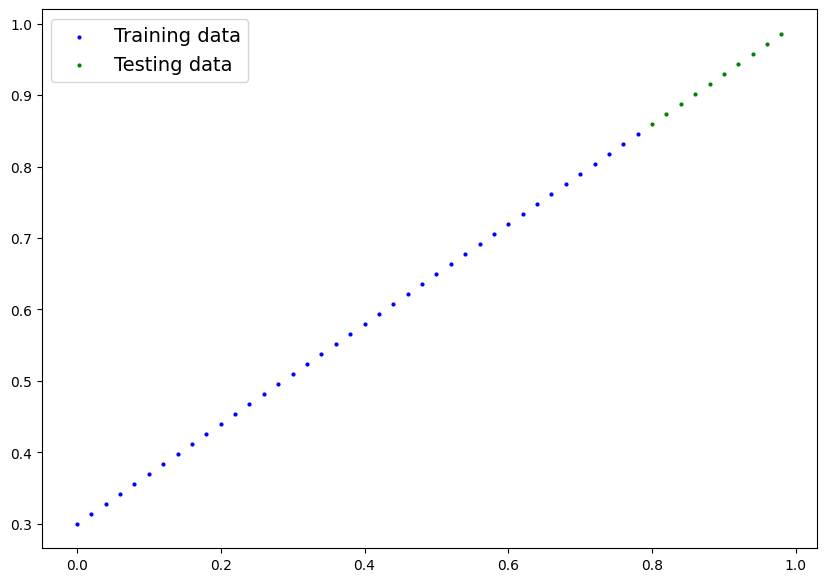

In [ ]:
plot_predictions()

In [ ]:
#model with pytorch
class LinearRegression(nn.Module):
  def __init__(self):
    super().__init__()
    self.weights = nn.Parameter(torch.randn(1,
                                            requires_grad=True,
                                            dtype=torch.float
                                            ))
    self.bias = nn.Parameter(torch.randn(1,
                                         requires_grad=True,
                                         dtype=torch.float))

  def forward(self,x):
    return self.weights * x + self.bias

In [ ]:
lr = LinearRegression()


In [ ]:
torch.manual_seed(42)

In [ ]:
lr

LinearRegression()

In [ ]:
list(lr.parameters())

[Parameter containing:
 tensor([1.6459], requires_grad=True),
 Parameter containing:
 tensor([-1.0938], requires_grad=True)]

In [ ]:
lr.state_dict()

OrderedDict([('weights', tensor([1.6459])), ('bias', tensor([-1.0938]))])

In [ ]:
#preds
with torch.inference_mode():
  y_preds = lr(X_test)
y_preds

tensor([[0.2230],
        [0.2559],
        [0.2888],
        [0.3217],
        [0.3546],
        [0.3875],
        [0.4205],
        [0.4534],
        [0.4863],
        [0.5192]])

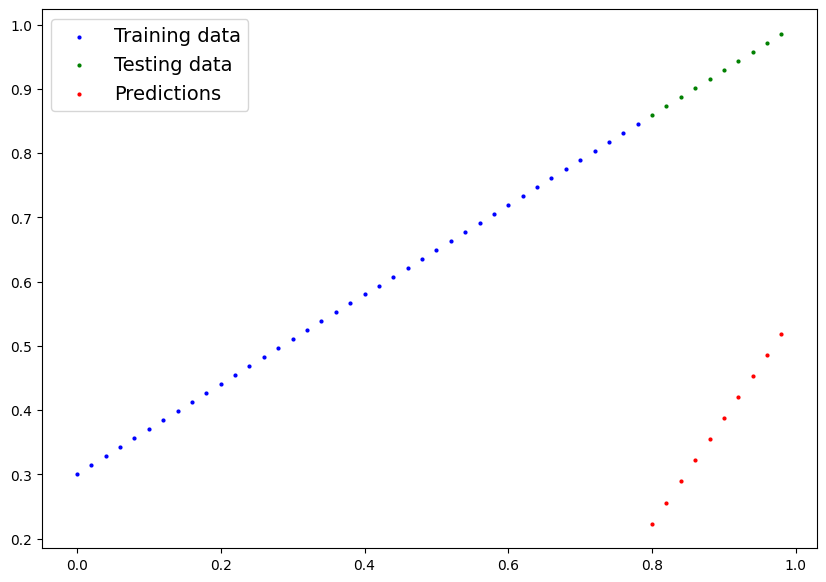

In [ ]:
plot_predictions(predictions=y_preds)

In [ ]:
#loss func start
lossfn = nn.L1Loss()
#optimizer
optimizer = torch.optim.SGD(params=lr.parameters(),
                            lr=0.01)

In [ ]:
torch.manual_seed(42)
#training loop
epoches = 100

for epoch in range(epoches):
  lr.train()
  #forward
  y_pred = lr(X_train)
  #loss
  loss = lossfn(y_pred,y_train)
  print(f'loss: {loss}')
  #optimizer
  optimizer.zero_grad()
  #backward
  loss.backward()
  #optimizer
  optimizer.step()

  #test
  lr.eval()
  with torch.inference_mode():
    pred = lr(X_test)

    test_loss = lossfn(pred,y_test)
  if epoch % 10==0:
    print(f'epoch:{epoch} ,test_loss:{test_loss}, loss:{loss}')
    print(f'{lr.state_dict()}')

loss: 0.024458957836031914
epoch:0 ,test_loss:0.05646304413676262, loss:0.024458957836031914
OrderedDict([('weights', tensor([0.5800])), ('bias', tensor([0.3503]))])
loss: 0.024110013619065285
loss: 0.02376994863152504
loss: 0.02342480979859829
loss: 0.023080935701727867
loss: 0.022739607840776443
loss: 0.022391926497220993
loss: 0.022054409608244896
loss: 0.02170540764927864
loss: 0.021366719156503677
loss: 0.021020207554101944
epoch:10 ,test_loss:0.04819049686193466, loss:0.021020207554101944
OrderedDict([('weights', tensor([0.5972])), ('bias', tensor([0.3433]))])
loss: 0.020677709951996803
loss: 0.02033500373363495
loss: 0.01998869702219963
loss: 0.019649803638458252
loss: 0.019300809130072594
loss: 0.018963487818837166
loss: 0.01861560344696045
loss: 0.018274478614330292
loss: 0.017930403351783752
loss: 0.01758546568453312
epoch:20 ,test_loss:0.04060482233762741, loss:0.01758546568453312
OrderedDict([('weights', tensor([0.6141])), ('bias', tensor([0.3358]))])
loss: 0.01724519953131

In [ ]:
with torch.inference_mode():
  y_pred = lr(X_test)
y_pred

tensor([[0.8685],
        [0.8825],
        [0.8965],
        [0.9105],
        [0.9245],
        [0.9384],
        [0.9524],
        [0.9664],
        [0.9804],
        [0.9944]])

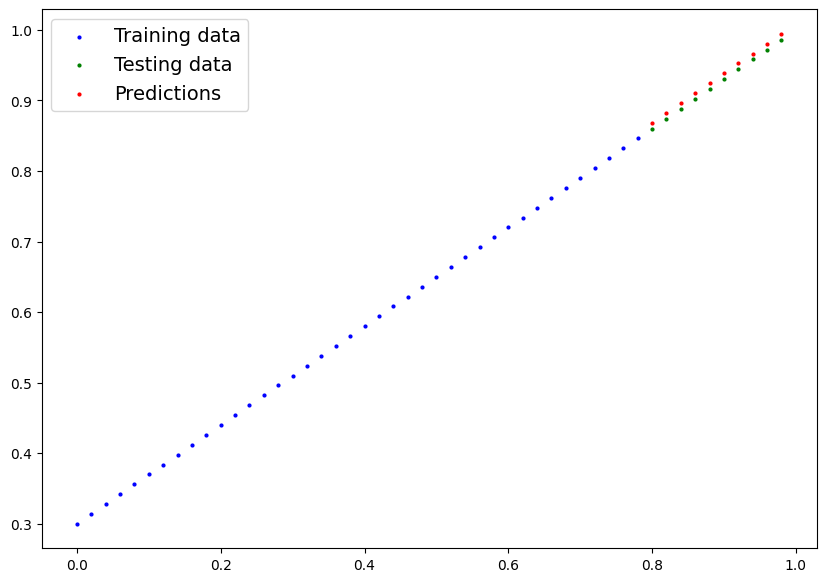

In [ ]:
plot_predictions(predictions=y_pred)